## ComputerVision and Convolutional Neural Networks in TensorFlow!

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing a car in front.

### This part is covering:

* Getting a dataset to work with
* Architecture of a *Convolutional Neural Network (CNN)* with Tensorflow
* An end-to-end binary image classification problem
* Steps in modelling with **CNN's**
 * Creating a CNN, compiling a model, fitting a model, evaluating a model
* An end-to-end multi-class image classification problem
* Making predictions on our own custom images


Architecture of a CNN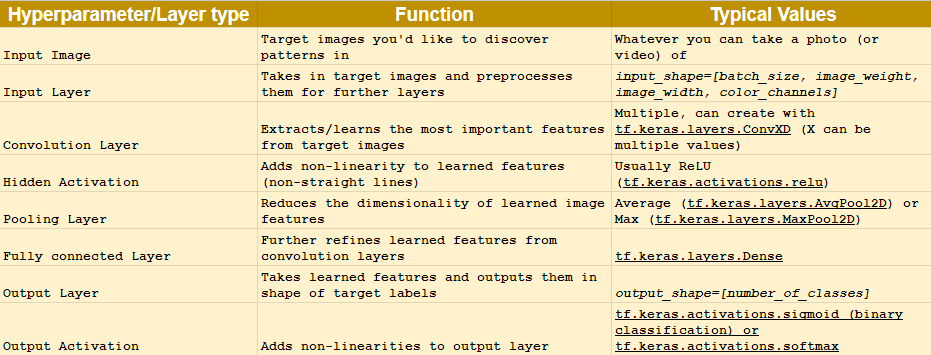

### Get the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2024-02-28 16:16:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.207, 173.194.203.207, 74.125.199.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  99.4MB/s    in 1.1s    

2024-02-28 16:16:13 (99.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### Inspect the data

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for computer vision project... this usually means visualizing many samles of oyur data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/test/steak

100274.jpg   148595.jpg   2138503.jpg  2752603.jpg  3173402.jpg  3873655.jpg  66858.jpg
1012080.jpg  1498778.jpg  2144308.jpg  2756200.jpg  321090.jpg	 3901703.jpg  670345.jpg
1016217.jpg  1499273.jpg  219196.jpg   2772358.jpg  3235645.jpg  3903517.jpg  673127.jpg
1064847.jpg  1515274.jpg  2193535.jpg  277297.jpg   324862.jpg	 3905395.jpg  690177.jpg
1082384.jpg  1523026.jpg  2198931.jpg  2802460.jpg  3293212.jpg  391144.jpg   690477.jpg
108310.jpg   1627703.jpg  221604.jpg   2814314.jpg  3293650.jpg  39461.jpg    697562.jpg
1094883.jpg  1653815.jpg  2229090.jpg  281731.jpg   3297938.jpg  399377.jpg   7056.jpg
1107549.jpg  1655387.jpg  2246332.jpg  2821155.jpg  3315737.jpg  400530.jpg   717293.jpg
1118585.jpg  1662212.jpg  2276476.jpg  2824517.jpg  3343970.jpg  400951.jpg   721500.jpg
1163050.jpg  168551.jpg   2285106.jpg  2825105.jpg  3352834.jpg  401660.jpg   730464.jpg
1166047.jpg  1687010.jpg  228683.jpg   284097.jpg   3383942.jpg  40947.jpg    746921.jpg
1190808.jpg  1718949.jpg  

In [4]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}".')

There are 2 directories and 0 images in "pizza_steak".
There are 2 directories and 0 images in "pizza_steak/test".
There are 0 directories and 250 images in "pizza_steak/test/pizza".
There are 0 directories and 250 images in "pizza_steak/test/steak".
There are 2 directories and 0 images in "pizza_steak/train".
There are 0 directories and 750 images in "pizza_steak/train/pizza".
There are 0 directories and 750 images in "pizza_steak/train/steak".


In [5]:
# Another way to find out how many images in a file
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [13]:
# Get the class names programatically
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectory
class_names

array(['pizza', 'steak'], dtype='<U5')

In [16]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get the random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print (f'Image shape: {img.shape}')

  return img

['717350.jpg']
Image shape: (512, 512, 3)


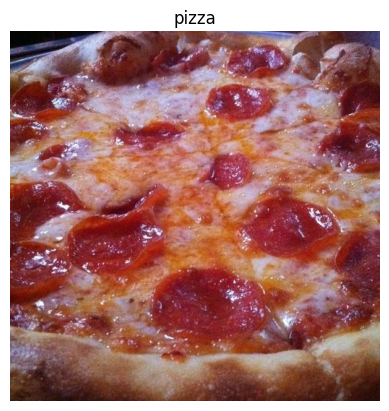

In [30]:
# View a random image from the training dataset
img = view_random_image(target_dir='pizza_steak/train/',target_class='pizza')

In [31]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[  4,   6,   3],
        [  3,   5,   2],
        [  2,   4,   1],
        ...,
        [ 71,  67, 118],
        [ 71,  66, 122],
        [ 64,  59, 115]],

       [[  2,   4,   1],
        [  2,   4,   1],
        [  3,   5,   2],
        ...,
        [ 76,  72, 123],
        [ 76,  71, 127],
        [ 79,  74, 130]],

       [[  1,   3,   0],
        [  2,   4,   1],
        [  3,   5,   2],
        ...,
        [ 76,  72, 123],
        [ 77,  72, 128],
        [ 80,  75, 131]],

       ...,

       [[ 62,  34,  22],
        [ 59,  31,  19],
        [ 65,  37,  25],
        ...,
        [ 38,  15,   7],
        [ 36,  13,   5],
        [ 37,  14,   6]],

       [[ 60,  32,  20],
        [ 56,  28,  16],
        [ 58,  32,  19],
        ...,
        [ 35,  15,   6],
        [ 34,  14,   5],
        [ 35,  15,   6]],

       [[ 61,  33,  21],
        [ 56,  28,  16],
        [ 57,  31,  18],
        ...,
        [ 36,  16,   